In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from aidam.math_utils import moving_function_rev1
from aidam.aicharts import get_subplot_cells_sequence, confplot_ax, auto_grid_shape
import pickle as pkl
import numpy as np
import pandas as pd

## Lettura dati

In [2]:
data_file='international_data.pkl'

infile=open(data_file,'rb')
trend=pkl.load(infile)
nazioni=pkl.load(infile)
continent_nations=pkl.load(infile)
infile.close()

In [3]:
for naz in nazioni:
    print('%30s DA: %s  A:  %s  [Samples: %3d]'%(naz,
                                                   trend['date'][naz][0],
                                                   trend['date'][naz][-1],
                                                  len(np.unique(trend['date'][naz]))))
    

                         Aruba DA: 2020-03-13  A:  2020-10-12  [Samples: 209]
                   Afghanistan DA: 2019-12-31  A:  2020-10-12  [Samples: 287]
                        Angola DA: 2020-03-22  A:  2020-10-12  [Samples: 205]
                      Anguilla DA: 2020-03-27  A:  2020-10-12  [Samples: 200]
                       Albania DA: 2020-03-09  A:  2020-10-12  [Samples: 218]
                       Andorra DA: 2020-03-03  A:  2020-10-12  [Samples: 219]
          United Arab Emirates DA: 2019-12-31  A:  2020-10-12  [Samples: 287]
                     Argentina DA: 2020-02-11  A:  2020-10-12  [Samples: 245]
                       Armenia DA: 2019-12-31  A:  2020-10-12  [Samples: 287]
           Antigua and Barbuda DA: 2020-03-15  A:  2020-10-12  [Samples: 207]
                     Australia DA: 2019-12-31  A:  2020-10-12  [Samples: 287]
                       Austria DA: 2019-12-31  A:  2020-10-12  [Samples: 287]
                    Azerbaijan DA: 2019-12-31  A:  2020-10-12  [

## Plot dati continentali

In [4]:
continente='europe'
num_nazioni=len(continent_nations[continente])

In [5]:
# per i subplot determina la griglia
grid_shape=auto_grid_shape(num_nazioni,cols=3)
grid_seq=get_subplot_cells_sequence(grid_shape)

# dimensioni figure (figsize) per figure singole e figure composte (subplot)
figsize_single=(9,6)
figsize_multi=(16,48)


In [6]:
#indicatori_selected=['new_cases','total_deaths', 'new_deaths', 'total_cases_per_million',
#       'new_cases_per_million', 'total_deaths_per_million','new_deaths_per_million']

#indicatori_selected=['new_cases_per_million','new_deaths_per_million']
indicatori_selected=['total_cases_per_million','total_deaths_per_million']

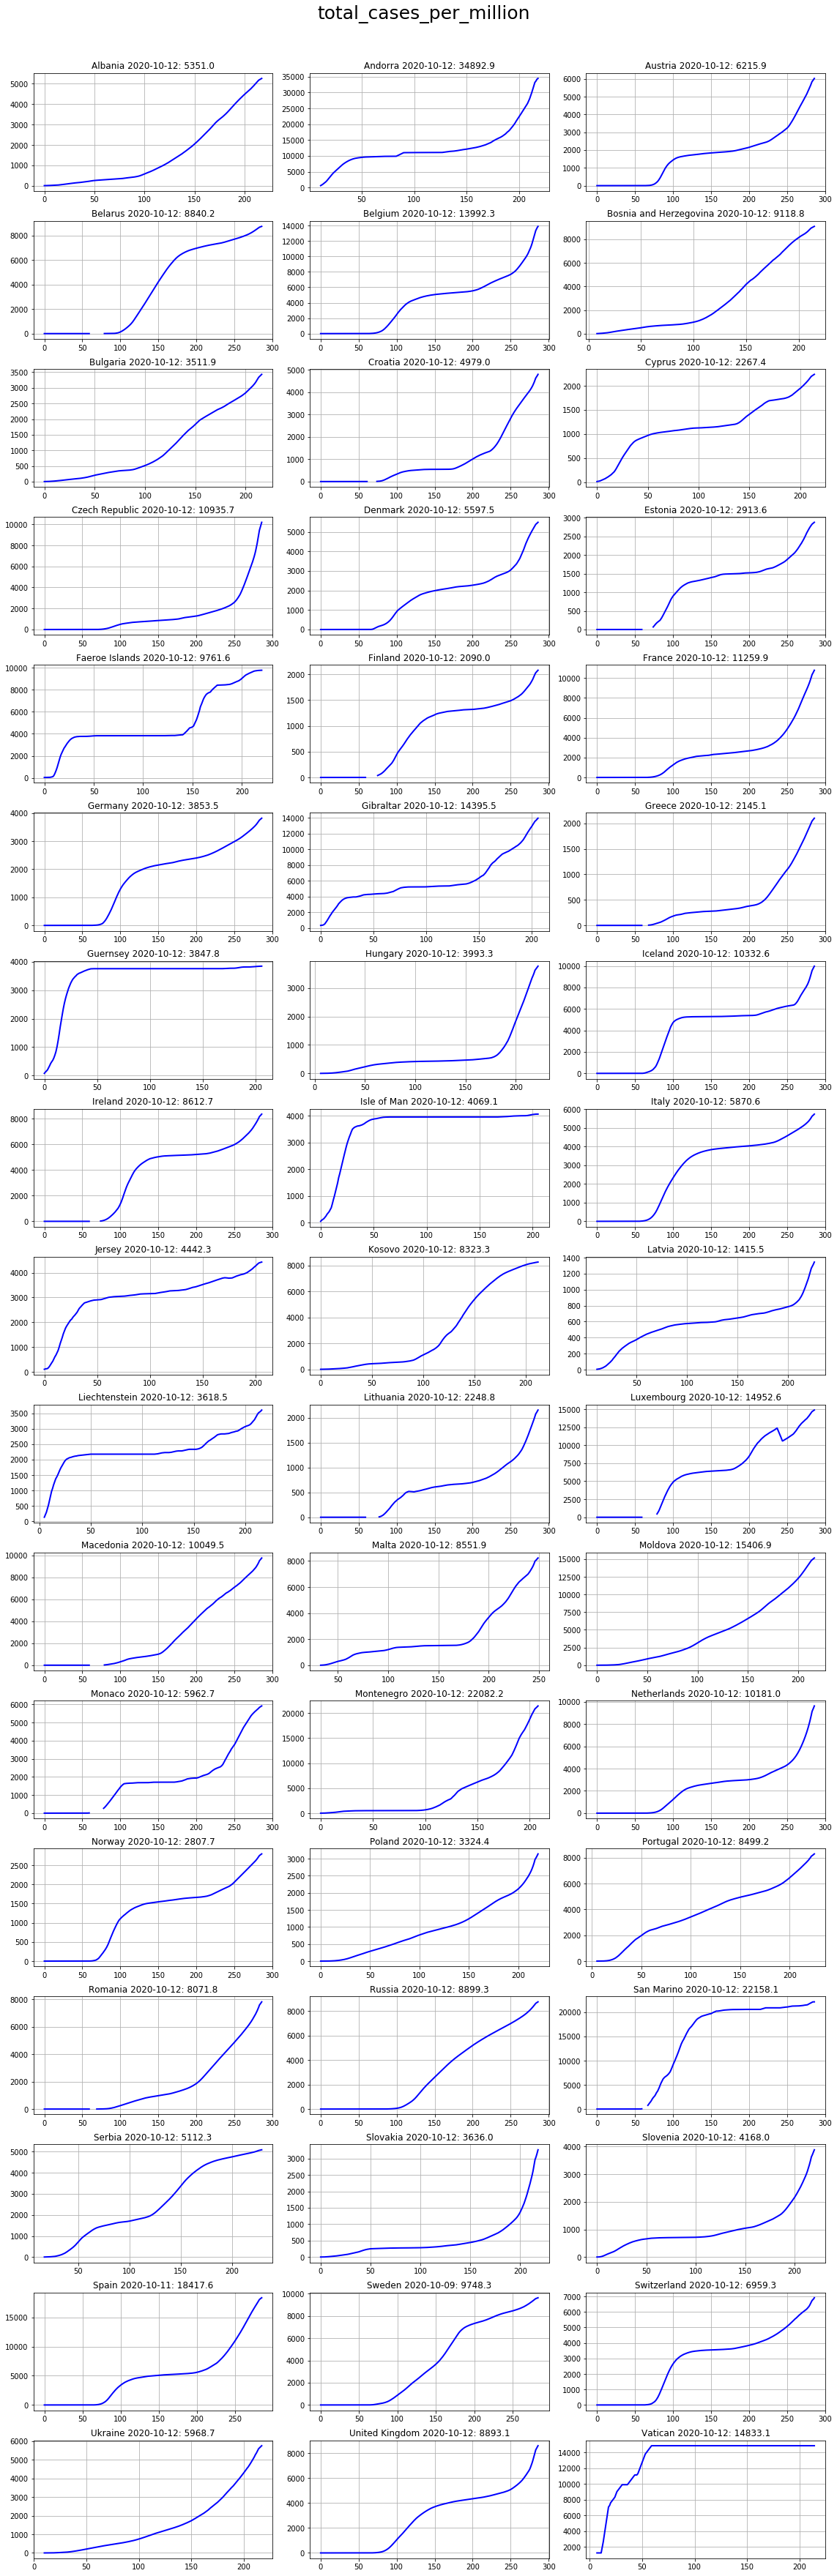

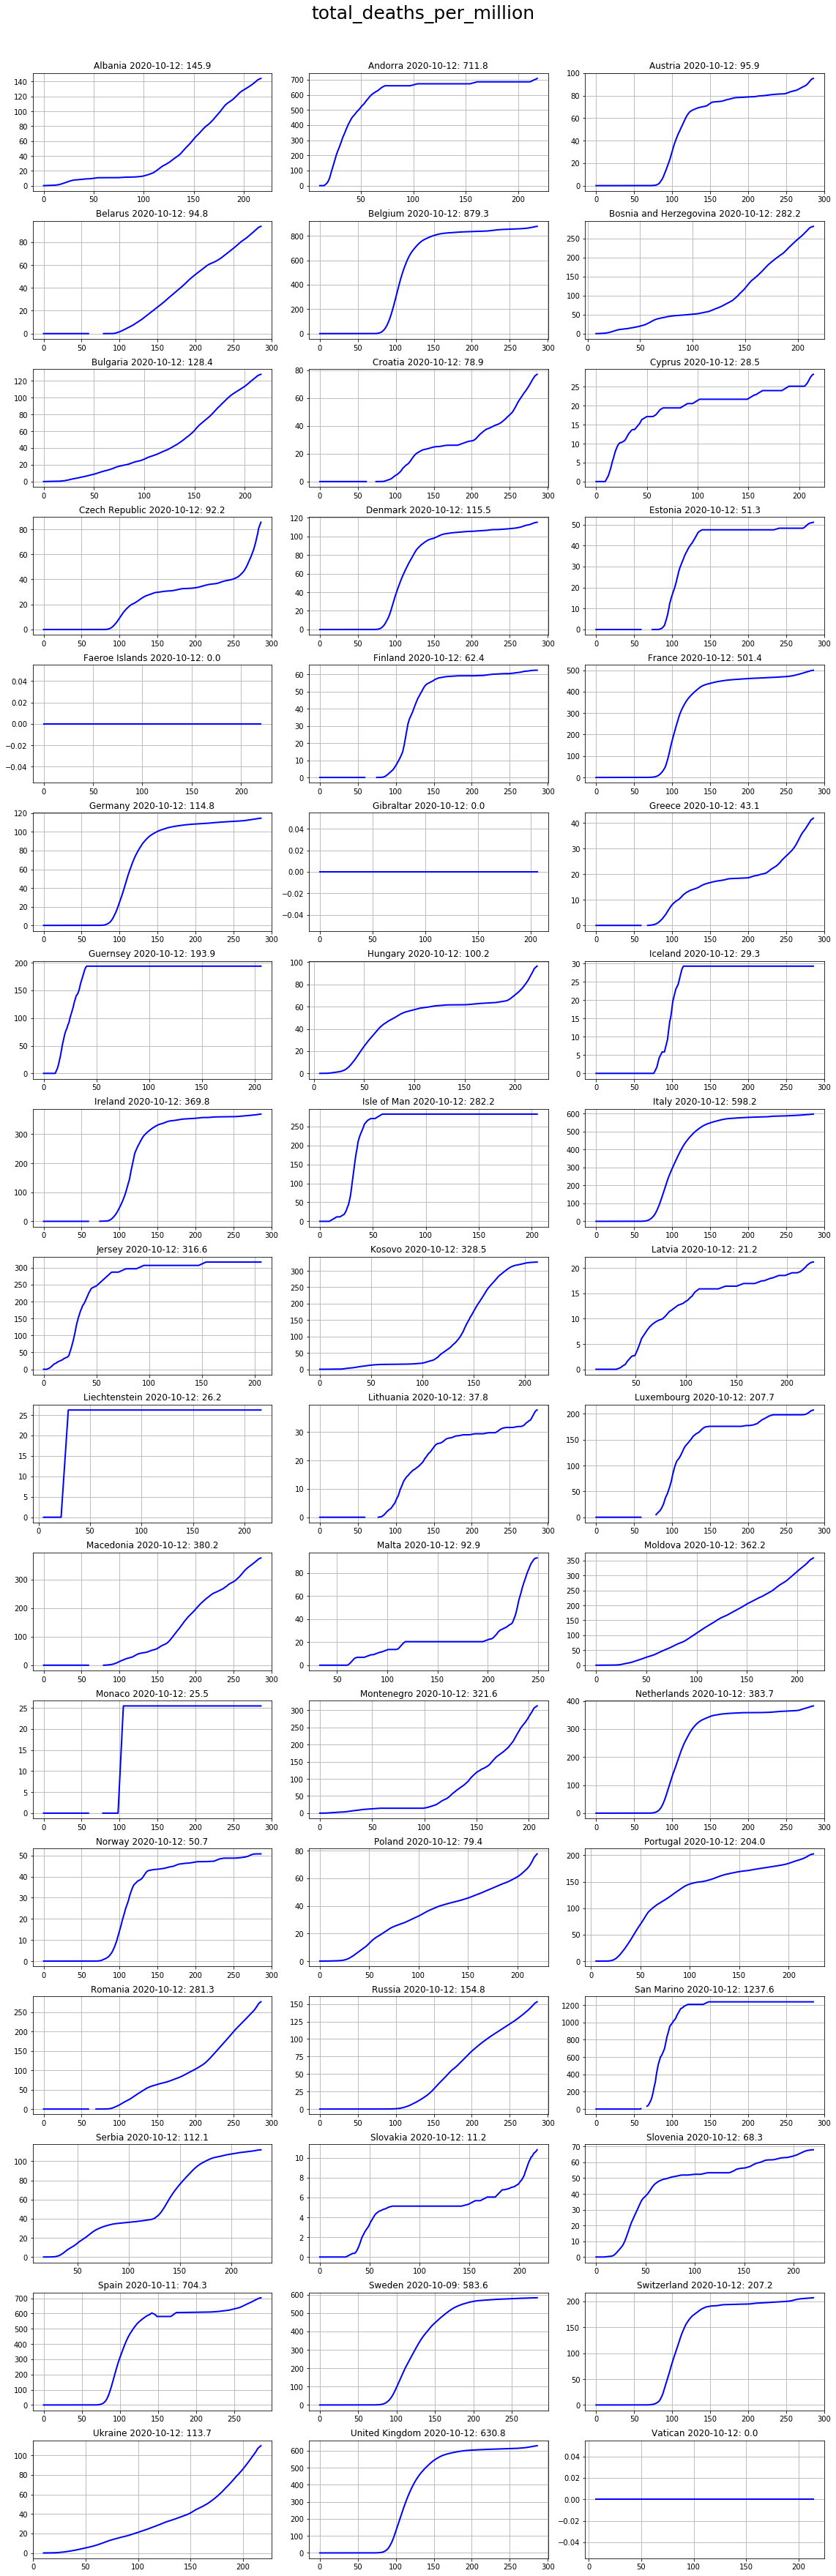

In [7]:
for indicatore in indicatori_selected:

    fig,ax=plt.subplots(grid_shape[0],grid_shape[1],sharey=False,figsize=figsize_multi)
    fig.suptitle(indicatore, y=1.02,fontsize=25)
    fig.tight_layout(pad=2.0)

    for i,naz in enumerate(continent_nations[continente]):
        #ax[grid_seq[i]].plot(range(len(trend['date'][naz])),trend[indicatore][naz],
        #                     'b-',linewidth=0.5,label='Reg')
        ax[grid_seq[i]].plot(range(len(trend['date'][naz])),moving_function_rev1(trend[indicatore][naz],np.mean,3,3),
                             'b-',linewidth=2,label='Trend')
        ax[grid_seq[i]].set_title(naz+' %s: %.1f'%(trend['date'][naz][-1],trend[indicatore][naz][-1]))
        #ax[grid_seq[i]].legend()
        ax[grid_seq[i]].grid()
        #ax[grid_seq[i]].set_yscale('log')
        
    fig.savefig('PIC_%s_%s.JPG'%(continente,indicatore))

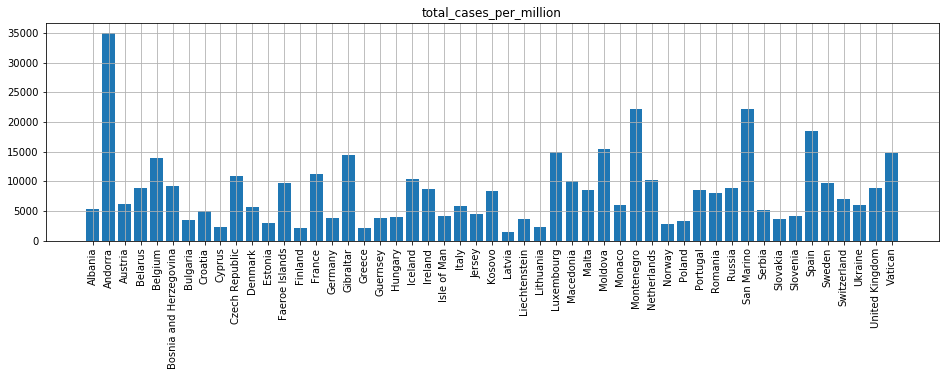

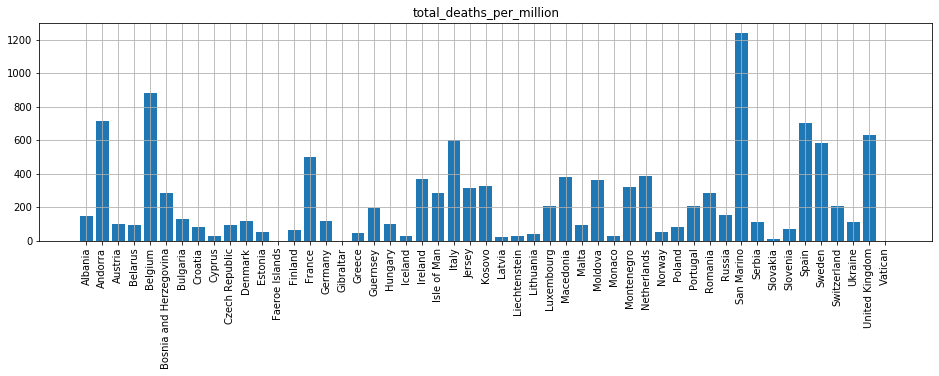

In [8]:
for indicatore in indicatori_selected:
    valori=[trend[indicatore][naz][-1] for naz in continent_nations[continente]]
    plt.figure(figsize=(16,4))
    plt.title(indicatore)
    plt.bar(range(len(valori)),valori)
    plt.xticks(range(len(valori)),continent_nations[continente],rotation=90)
    plt.grid()
    plt.show()

#### Versione ordinata

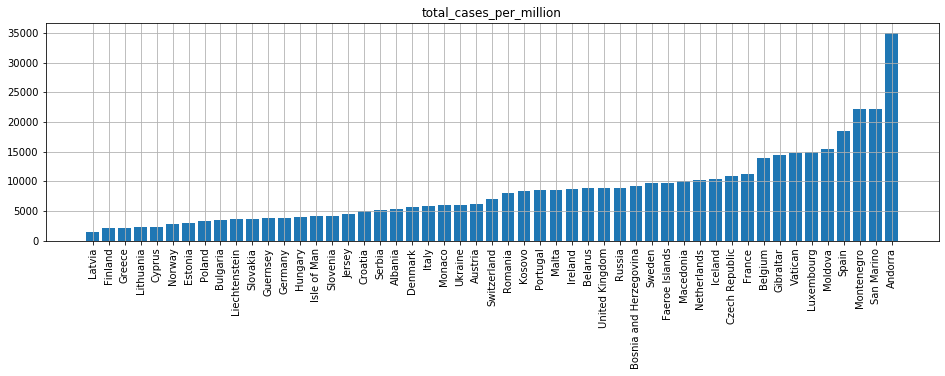

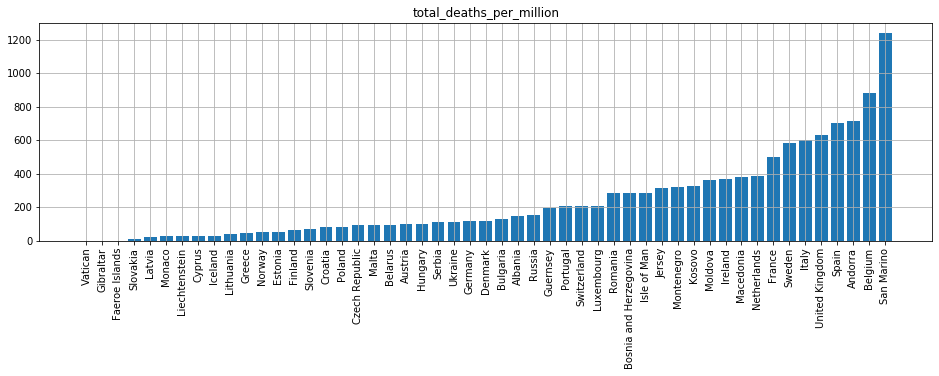

In [9]:

for indicatore in indicatori_selected:
    valori=np.array([trend[indicatore][naz][-1] for naz in continent_nations[continente]])
    ordine=np.argsort(valori)
    plt.figure(figsize=(16,4))
    plt.title(indicatore)
    plt.bar(range(len(valori)),valori[ordine])
    plt.xticks(range(len(valori)),continent_nations[continente][ordine],rotation=90)
    plt.grid()
    plt.show()